PIPELINE 1: DATASET BAN ĐẦU -> RANDOM FORESTS

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('../clean.csv')

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


Phân tách các đặc trưng và biến mục tiêu

In [10]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

Chuẩn hóa dữ liệu

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Chia tập train/test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29020, 17)
X_test shape: (7255, 17)
y_train shape: (29020,)
y_test shape: (7255,)


Train model

In [13]:
model = RandomForestClassifier(
    n_estimators=100,    
    max_depth=10,           
    min_samples_split=10,   
    min_samples_leaf=5,   
    random_state=42          
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

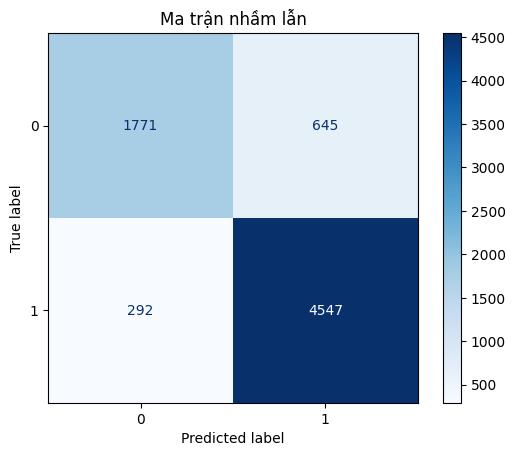

Kết quả:

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      2416
           1       0.88      0.94      0.91      4839

    accuracy                           0.87      7255
   macro avg       0.87      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.grid(False)
plt.show()

print("Kết quả:\n")
print(classification_report(y_test, y_pred))